In [ ]:
# Libraries for exploring, handling and visualizing data
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
# Sklearn's preprocessing library
from sklearn.preprocessing import StandardScaler
# Importing train and test data split
from sklearn.model_selection import train_test_split
# Sklearn's metrics to evaluate our models
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


# Setting theme style and color palette to seaborn
sns.set_theme(context = 'notebook', style='darkgrid',palette='muted')

In [ ]:
pwd

'C:\\Users\\student'

In [ ]:
# Importing data
df = pd.read_csv('creditcard.csv')
# Display dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Select features
selected_features = ['Time', 'V1', 'V2', 'V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']

In [ ]:
# Preprocess the data
X = df[selected_features]
y = df['Class']  # Assuming 'Class' is the target variable

In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
# Tokenization
from transformers import BertTokenizer, BertModel
concatenated_features = X.apply(lambda row: ' '.join(map(str, row)), axis=1)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_texts2 = concatenated_features.apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# BERT Encoding

model = BertModel.from_pretrained('bert-base-uncased')
encoded_features = []
for tokens in tokenized_texts2:
    with torch.no_grad():
        outputs = model(torch.tensor(tokens).unsqueeze(0))
    last_hidden_states = outputs.last_hidden_state
    encoded_features.append(last_hidden_states.mean(dim=1).squeeze().numpy())

X_encoded = np.vstack(encoded_features)

In [ ]:
np.save('X_encoded.npy', X_encoded)

In [ ]:
X_encoded = np.load('X_encoded.npy')

In [ ]:
from sklearn.metrics import classification_report
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Train the classifier (Decision Tree)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test)

Classification Report:


NameError: name 'y_test1' is not defined

In [ ]:
# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.24      0.31      0.27        98

    accuracy                           1.00     56962
   macro avg       0.62      0.65      0.63     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9971559987359995


In [ ]:
import pandas as pd
import numpy as np


# Combine X_encoded and y into a single DataFrame
df_encoded = pd.DataFrame(X_encoded)
df_encoded['Class'] = y

# Separate entries by class
class_1_entries_encoded = df_encoded[df_encoded['Class'] == 1]
class_0_entries_encoded = df_encoded[df_encoded['Class'] == 0]

# Calculate the number of class 1 entries
num_class_1_entries_encoded = len(class_1_entries_encoded)

# Calculate the number of class 0 entries needed for 10-90 distribution
num_class_0_entries_needed_encoded = int(num_class_1_entries_encoded * 9.6 / 0.4)

# Sample class 0 entries to achieve the desired distribution
class_0_entries_sampled_encoded = class_0_entries_encoded.sample(n=num_class_0_entries_needed_encoded, random_state=42)

# Concatenate class 1 entries and sampled class 0 entries
df_balanced_encoded = pd.concat([class_1_entries_encoded, class_0_entries_sampled_encoded])

# Shuffle the balanced dataset
df_balanced_encoded = df_balanced_encoded.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate X_encoded1 and y1
X_encoded1 = df_balanced_encoded.drop(columns=['Class']).values
y1 = df_balanced_encoded['Class'].values

# Display the class distribution of the balanced dataset
print("Class distribution after balancing:")
print(df_balanced_encoded['Class'].value_counts())

Class distribution after balancing:
0    11807
1      492
Name: Class, dtype: int64


In [ ]:
from sklearn.metrics import classification_report
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded1, y1, test_size=0.2, random_state=42)


# Train the classifier (Decision Tree)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

Classification Report:


ValueError: Found input variables with inconsistent numbers of samples: [2460, 56962]

In [ ]:
# Make predictions on the test set
# Make predictions on the test set
predictions1 = clf.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, predictions1))
print("Accuracy:", accuracy_score(y_test, predictions1))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2366
           1       0.49      0.63      0.55        94

    accuracy                           0.96      2460
   macro avg       0.74      0.80      0.77      2460
weighted avg       0.97      0.96      0.96      2460

Accuracy: 0.9609756097560975


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Reshape X_encoded to 2D array if needed
if len(X_encoded.shape) > 1:
    X_encoded_flat = X_encoded.reshape(X_encoded.shape[0], -1)
else:
    X_encoded_flat = X_encoded.reshape(-1, 1)

# Apply SMOTE
X_encoded2, y2 = smote.fit_resample(X_encoded_flat, y)

# If the shape of X_encoded2 is different from the original, reshape it back
if len(X_encoded.shape) > 1:
    X_encoded2 = X_encoded2.reshape(-1, X_encoded.shape[1])

# Display the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y2).value_counts())

Class distribution after SMOTE:
0    284315
1    284315
Name: Class, dtype: int64


In [ ]:
from sklearn.metrics import classification_report
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded2, y2, test_size=0.3, random_state=42)



# Train the classifier (Decision Tree)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions1 = clf.predict(X_test)

# Evaluate the classifier
print("Classification Report: Decision Tree")
print(classification_report(y_test, predictions1))
print("Accuracy:", accuracy_score(y_test, predictions1))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85149
           1       0.99      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Accuracy: 0.9950700220999009


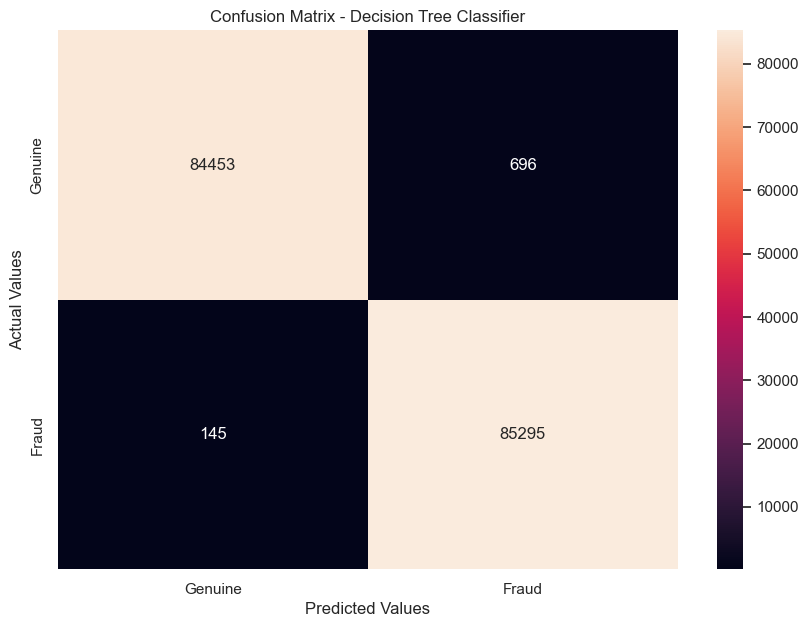

In [ ]:
# Confusion Matrix for Random Forest
confusion_matrix_clf = confusion_matrix(y_test, predictions1)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_clf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree Classifier')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [ ]:
y_predictions_dt = predictions1

In [ ]:
# Printing Evaluation Metrics for Decision Tree
metrics = [['Accuracy',(accuracy_score(y_test, y_predictions_dt))],
                         ['Precision',precision_score(y_test, y_predictions_dt)],
                         ['Recall', recall_score(y_test, y_predictions_dt)],
                         ['F1_score',f1_score(y_test, y_predictions_dt)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.995070
1,Precision,0.991906
2,Recall,0.998303
3,F1_score,0.995094


In [ ]:
np.save('y_predictions_dt.npy', y_predictions_dt)

In [ ]:
# Applying Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 123)
random_forest.fit(X_train, y_train)


y_predictions_rf = random_forest.predict(X_test)

# Applying Ada Boost Classifier
ada_boost = AdaBoostClassifier(n_estimators = 100, random_state = 123)
ada_boost.fit(X_train, y_train)

y_predictions_ab = ada_boost.predict(X_test)

# Applying Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 123)
gradient_boosting.fit(X_train, y_train)

y_prediction_gb = gradient_boosting.predict(X_test)

C:\Users\student\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ModuleNotFoundError: No module named 'lightgbm'

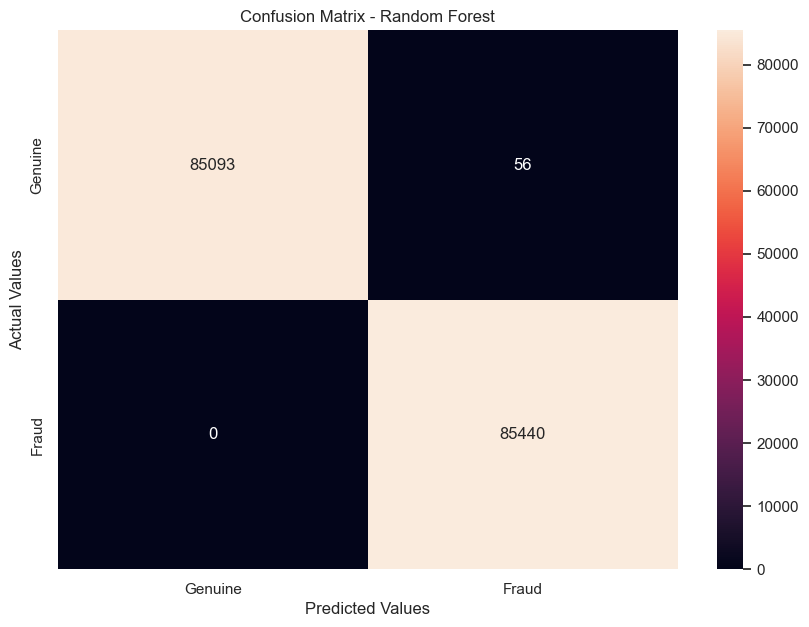

In [ ]:
# Confusion Matrix for Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_predictions_rf)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [ ]:
# Printing Evaluation Metrics for Random Forest
metrics = [['Accuracy',(accuracy_score(y_test, y_predictions_rf))],
                         ['Precision',precision_score(y_test, y_predictions_rf)],
                         ['Recall', recall_score(y_test, y_predictions_rf)],
                         ['F1_score',f1_score(y_test, y_predictions_rf)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.999672
1,Precision,0.999345
2,Recall,1.000000
3,F1_score,0.999672


In [ ]:
np.save('y_predictions_rf.npy', y_predictions_rf)

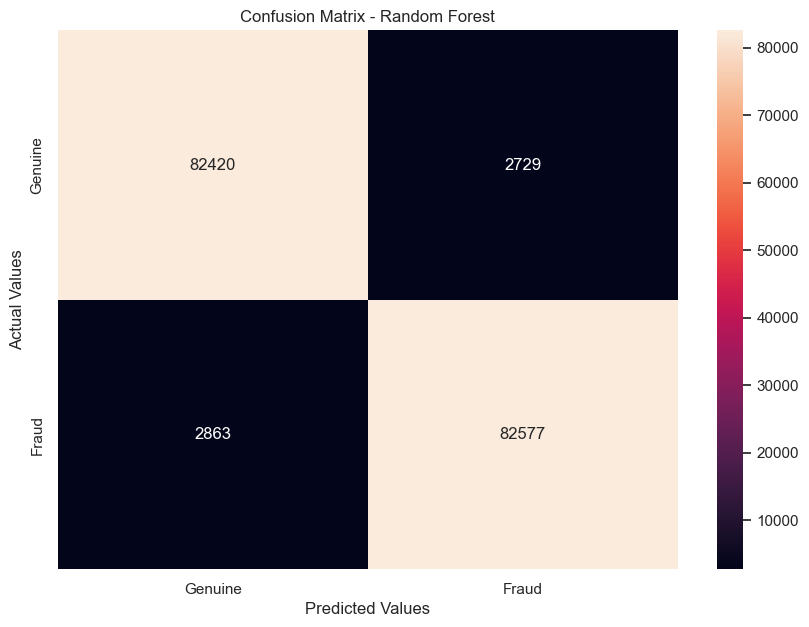

In [ ]:
# Confusion Matrix for ADA Boosting Classsifier
confusion_matrix_ab = confusion_matrix(y_test, y_predictions_ab)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ab, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [ ]:
# Printing Evaluation Metrics for ADA Boosting Classsifier
metrics = [['Accuracy',(accuracy_score(y_test, y_predictions_ab))],
                         ['Precision',precision_score(y_test, y_predictions_ab)],
                         ['Recall', recall_score(y_test, y_predictions_ab)],
                         ['F1_score',f1_score(y_test, y_predictions_ab)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.967219
1,Precision,0.968009
2,Recall,0.966491
3,F1_score,0.967250


In [ ]:
np.save('y_predictions_ab.npy',y_predictions_ab)

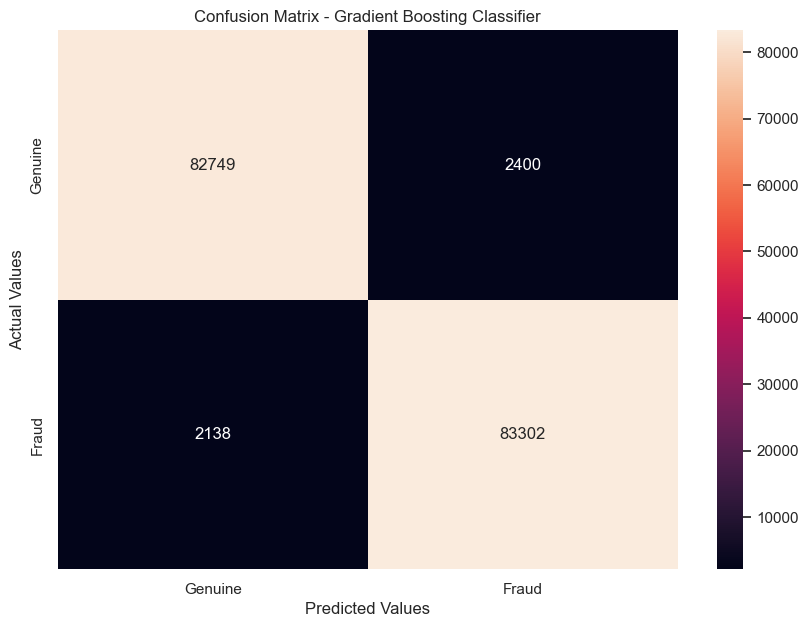

In [ ]:
# Confusion Matrix for Gradient Boosting Classsifier
confusion_matrix_gb = confusion_matrix(y_test, y_prediction_gb)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [ ]:
# Printing Evaluation Metrics for Gradient Boosting Classsifier
metrics = [['Accuracy',(accuracy_score(y_test, y_prediction_gb))],
                         ['Precision',precision_score(y_test, y_prediction_gb)],
                         ['Recall', recall_score(y_test, y_prediction_gb)],
                         ['F1_score',f1_score(y_test, y_prediction_gb)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.973398
1,Precision,0.971996
2,Recall,0.974977
3,F1_score,0.973484


In [ ]:
np.save('y_prediction_gb.npy',y_prediction_gb)

In [ ]:
# Import the necessary libraries
import lightgbm as lgb
import xgboost as xgb

# Applying LightGBM Classifier
lightgbm_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=123)
lightgbm_classifier.fit(X_train, y_train)

y_predictions_lgbm = lightgbm_classifier.predict(X_test)

# Applying XGBoost Classifier
xgboost_classifier = xgb.XGBClassifier(n_estimators=100, random_state=123)
xgboost_classifier.fit(X_train, y_train)

y_predictions_xgb = xgboost_classifier.predict(X_test)

[LightGBM] [Info] Number of positive: 198875, number of negative: 199166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.239038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 398041, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499634 -> initscore=-0.001462
[LightGBM] [Info] Start training from score -0.001462


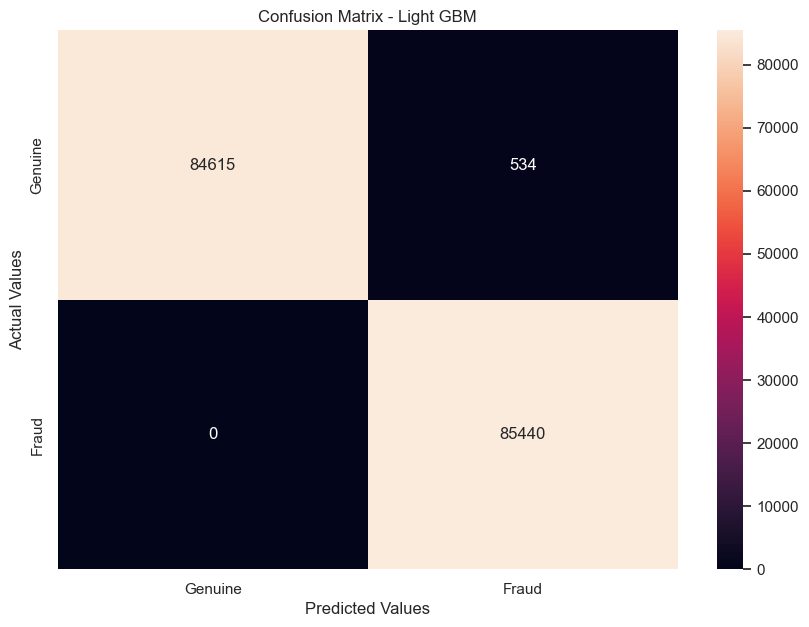

In [ ]:
# Confusion Matrix for lgbm
confusion_matrix_lgbm = confusion_matrix(y_test, y_predictions_lgbm)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_lgbm, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Light GBM')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [ ]:
# Printing Evaluation Metrics for lgbm
metrics = [['Accuracy',(accuracy_score(y_test, y_predictions_lgbm))],
                         ['Precision',precision_score(y_test, y_predictions_lgbm)],
                         ['Recall', recall_score(y_test, y_predictions_lgbm)],
                         ['F1_score',f1_score(y_test, y_predictions_lgbm)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.996870
1,Precision,0.993789
2,Recall,1.000000
3,F1_score,0.996885


In [ ]:
np.save('y_predictions_lgbm.npy',y_predictions_lgbm)

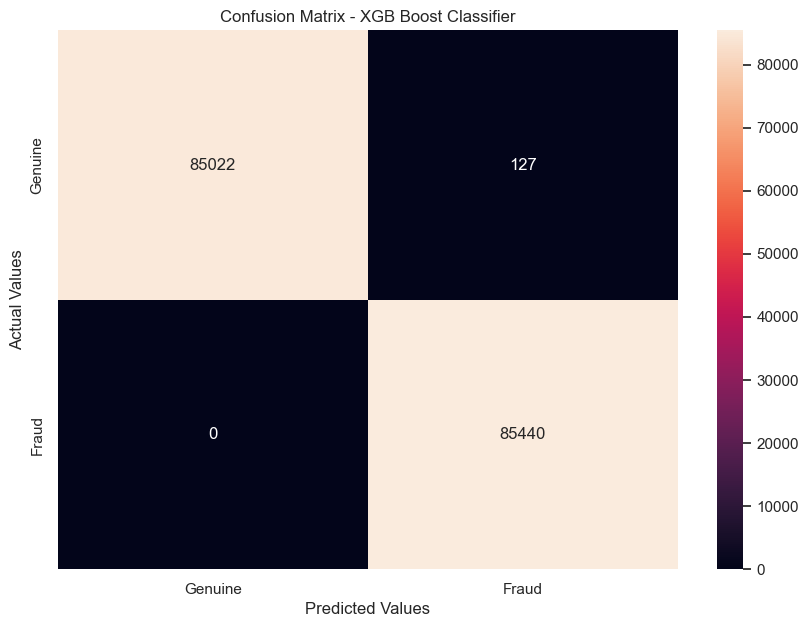

In [ ]:
# Confusion Matrix for xgb
confusion_matrix_xgb = confusion_matrix(y_test, y_predictions_xgb)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - XGB Boost Classifier')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [ ]:
# Printing Evaluation Metrics for xgb
metrics = [['Accuracy',(accuracy_score(y_test, y_predictions_xgb))],
                         ['Precision',precision_score(y_test, y_predictions_xgb)],
                         ['Recall', recall_score(y_test, y_predictions_xgb)],
                         ['F1_score',f1_score(y_test, y_predictions_xgb)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.999256
1,Precision,0.998516
2,Recall,1.000000
3,F1_score,0.999257


In [ ]:
np.save('y_predictions_xgb.npy',y_predictions_xgb)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create a dictionary to store classifier names and predictions
classifiers = {
    'Decision Tree': y_predictions_dt,
    'Random Forest': y_predictions_rf,
    'Ada Boost': y_predictions_ab,
    'Gradient Boosting': y_prediction_gb,
    'LightGBM': y_predictions_lgbm,
    'XGBoost': y_predictions_xgb
}

# Create an empty dictionary to store evaluation metrics
evaluation_metrics = {}

# Loop through classifiers and calculate evaluation metrics
for clf_name, y_pred in classifiers.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store evaluation metrics in the dictionary
    evaluation_metrics[clf_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Create a DataFrame from the dictionary of evaluation metrics
metrics_df = pd.DataFrame.from_dict(evaluation_metrics, orient='index')

# Display the DataFrame
print(metrics_df)

                   Accuracy  Precision    Recall  F1 Score
Decision Tree      0.995070   0.991906  0.998303  0.995094
Random Forest      0.999672   0.999345  1.000000  0.999672
Ada Boost          0.967219   0.968009  0.966491  0.967250
Gradient Boosting  0.973398   0.971996  0.974977  0.973484
LightGBM           0.996870   0.993789  1.000000  0.996885
XGBoost            0.999256   0.998516  1.000000  0.999257


In [ ]:
X_encoded

array([[-0.16287857, -0.00655118,  0.55596125, ..., -0.3584991 ,
        -0.02523544,  0.23013349],
       [-0.1180625 , -0.05906546,  0.555981  , ..., -0.3425396 ,
        -0.06443287,  0.27508268],
       [-0.21190308,  0.00098572,  0.57984304, ..., -0.33328876,
        -0.03716788,  0.24302207],
       ...,
       [-0.09440421,  0.04634952,  0.5562191 , ..., -0.3403988 ,
        -0.01452629,  0.24314877],
       [-0.20697555, -0.06576725,  0.50770676, ..., -0.36492676,
        -0.10662687,  0.26905864],
       [-0.20190188, -0.00147248,  0.53875786, ..., -0.36668125,
        -0.02723132,  0.13142009]], dtype=float32)

In [ ]:
# Tokenization
from transformers import GPT2Tokenizer, GPT2Model
concatenated_features = X.apply(lambda row: ' '.join(map(str, row)), axis=1)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenized_texts3 = concatenated_features.apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

import torch
from transformers import GPT2Tokenizer, GPT2Model

# GPT-2 Encoding
model = GPT2Model.from_pretrained('gpt2')
encoded_features = []
for tokens in tokenized_texts3:
    with torch.no_grad():
        outputs = model(torch.tensor(tokens).unsqueeze(0))
    last_hidden_states = outputs.last_hidden_state
    encoded_features.append(last_hidden_states.mean(dim=1).squeeze().numpy())

X_encoded2 = np.vstack(encoded_features)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

C:\Users\student\anaconda3\Lib\site-packages\huggingface_hub-0.21.4-py3.8.egg\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\student\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

In [ ]:
np.save('X_encoded2.npy',X_encoded2)

In [ ]:
# Split the data into train and test sets
from sklearn.metrics import classification_report
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded2, y, test_size=0.2, random_state=42)

# Train the classifier (Decision Tree)
clf = DecisionTreeClassifier()
clf.fit(X_train2, y_train2)

# Make predictions on the test set
predictions2 = clf.predict(X_test2)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test2, predictions2))
print("Accuracy:", accuracy_score(y_test2, predictions2))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.18      0.22      0.20        98

    accuracy                           1.00     56962
   macro avg       0.59      0.61      0.60     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9969277764123451


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Reshape X_encoded to 2D array if needed
if len(X_encoded2.shape) > 1:
    X_encoded_flat = X_encoded2.reshape(X_encoded2.shape[0], -1)
else:
    X_encoded_flat = X_encoded2.reshape(-1, 1)

# Apply SMOTE
X_encoded3, y3 = smote.fit_resample(X_encoded_flat, y)

# If the shape of X_encoded2 is different from the original, reshape it back
if len(X_encoded2.shape) > 1:
    X_encoded3 = X_encoded3.reshape(-1, X_encoded2.shape[1])

# Display the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y3).value_counts())

Class distribution after SMOTE:
0    284315
1    284315
Name: Class, dtype: int64


In [ ]:
from sklearn.metrics import classification_report
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded3, y3, test_size=0.3, random_state=42)



# Train the classifier (Decision Tree)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions1 = clf.predict(X_test)

# Evaluate the classifier
print("Classification Report: Decision Tree")
print(classification_report(y_test, predictions1))
print("Accuracy:", accuracy_score(y_test, predictions1))

Classification Report: Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85149
           1       0.99      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Accuracy: 0.995708984752827


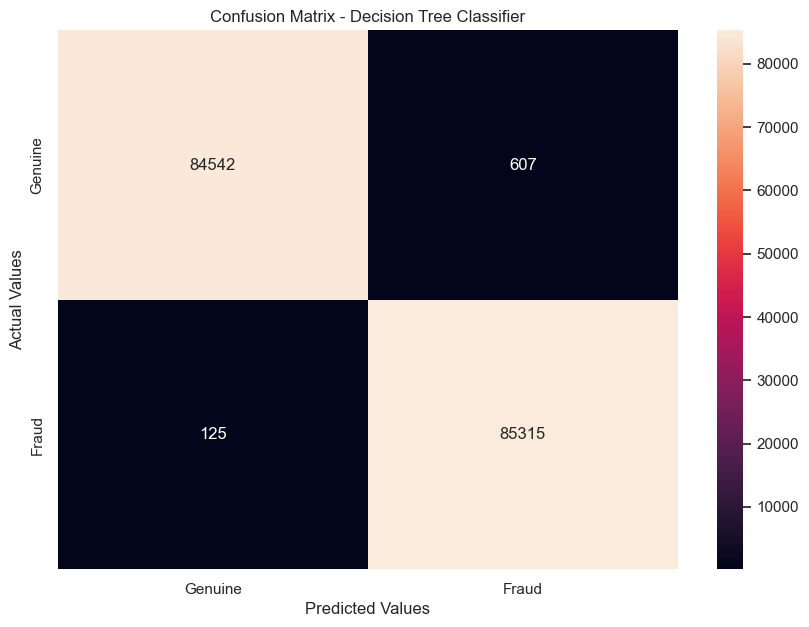

In [ ]:
# Confusion Matrix for Random Forest
confusion_matrix_clf = confusion_matrix(y_test, predictions1)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_clf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree Classifier')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [ ]:
y_predictions_dt = predictions1

In [ ]:
# Printing Evaluation Metrics for Decision Tree
metrics = [['Accuracy',(accuracy_score(y_test, y_predictions_dt))],
                         ['Precision',precision_score(y_test, y_predictions_dt)],
                         ['Recall', recall_score(y_test, y_predictions_dt)],
                         ['F1_score',f1_score(y_test, y_predictions_dt)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.995709
1,Precision,0.992935
2,Recall,0.998537
3,F1_score,0.995728


In [ ]:
# Applying Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 123)
random_forest.fit(X_train, y_train)


y_predictions_rf = random_forest.predict(X_test)

# Applying Ada Boost Classifier
ada_boost = AdaBoostClassifier(n_estimators = 100, random_state = 123)
ada_boost.fit(X_train, y_train)

y_predictions_ab = ada_boost.predict(X_test)

# Applying Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 123)
gradient_boosting.fit(X_train, y_train)

y_prediction_gb = gradient_boosting.predict(X_test)

C:\Users\student\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


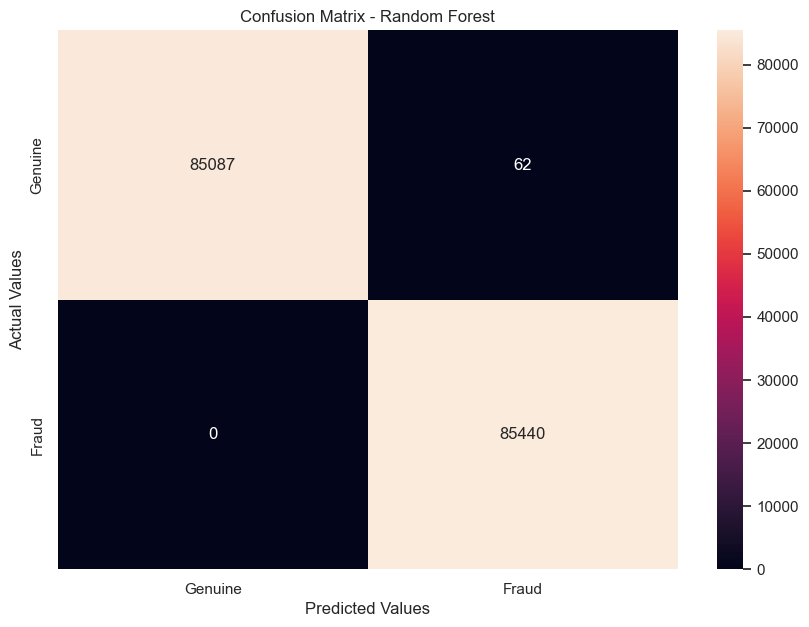

In [ ]:
# Confusion Matrix for Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_predictions_rf)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()


In [ ]:
# Printing Evaluation Metrics for Random Forest
metrics = [['Accuracy',(accuracy_score(y_test, y_predictions_rf))],
                         ['Precision',precision_score(y_test, y_predictions_rf)],
                         ['Recall', recall_score(y_test, y_predictions_rf)],
                         ['F1_score',f1_score(y_test, y_predictions_rf)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.999637
1,Precision,0.999275
2,Recall,1.000000
3,F1_score,0.999637


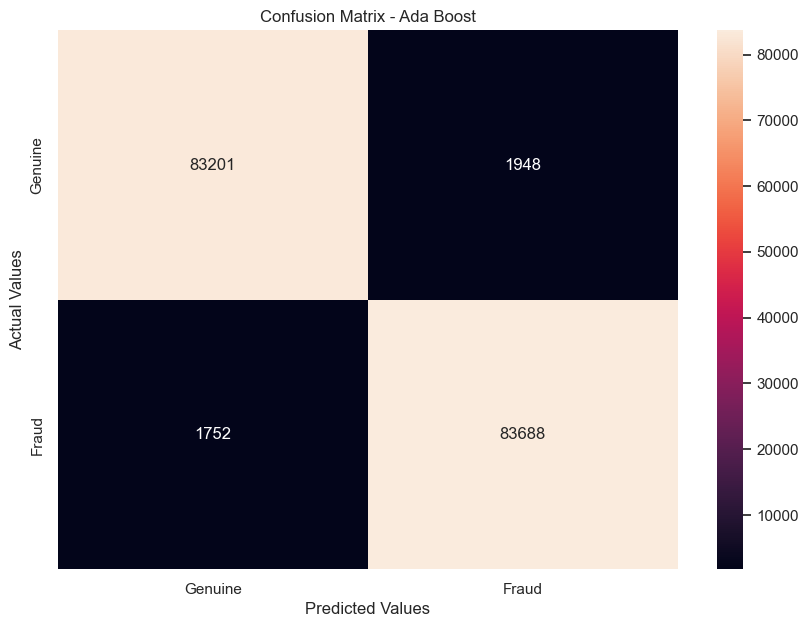

In [ ]:
# Confusion Matrix for ADA Boosting Classsifier
confusion_matrix_ab = confusion_matrix(y_test, y_predictions_ab)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ab, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Ada Boost')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [ ]:
# Printing Evaluation Metrics for ADA Boosting Classsifier
metrics = [['Accuracy',(accuracy_score(y_test, y_predictions_ab))],
                         ['Precision',precision_score(y_test, y_predictions_ab)],
                         ['Recall', recall_score(y_test, y_predictions_ab)],
                         ['F1_score',f1_score(y_test, y_predictions_ab)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.978310
1,Precision,0.977253
2,Recall,0.979494
3,F1_score,0.978372


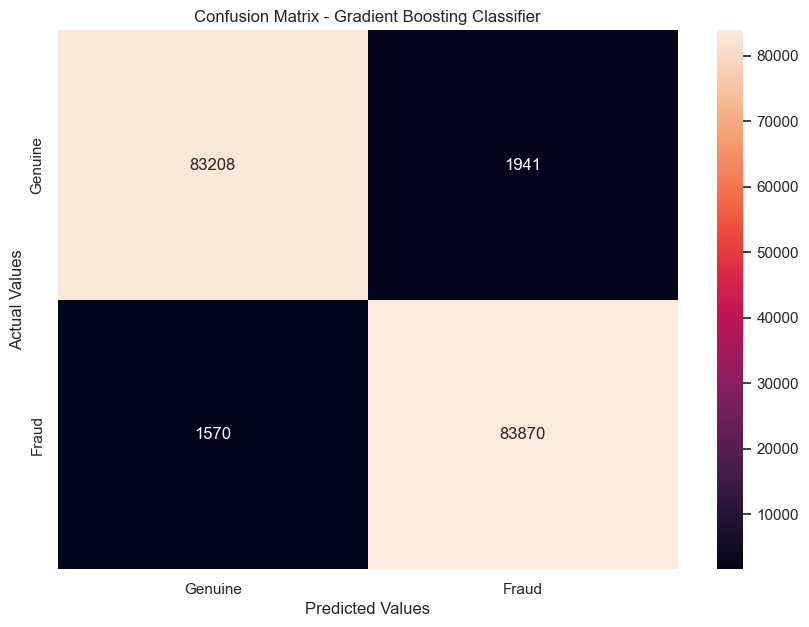

In [ ]:
# Confusion Matrix for Gradient Boosting Classsifier
confusion_matrix_gb = confusion_matrix(y_test, y_prediction_gb)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [ ]:
# Printing Evaluation Metrics for Gradient Boosting Classsifier
metrics = [['Accuracy',(accuracy_score(y_test, y_prediction_gb))],
                         ['Precision',precision_score(y_test, y_prediction_gb)],
                         ['Recall', recall_score(y_test, y_prediction_gb)],
                         ['F1_score',f1_score(y_test, y_prediction_gb)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.979418
1,Precision,0.977381
2,Recall,0.981625
3,F1_score,0.979498


In [ ]:
# Import the necessary libraries
import lightgbm as lgb
import xgboost as xgb

# Applying LightGBM Classifier
lightgbm_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=123)
lightgbm_classifier.fit(X_train, y_train)

y_predictions_lgbm = lightgbm_classifier.predict(X_test)

# Applying XGBoost Classifier
xgboost_classifier = xgb.XGBClassifier(n_estimators=100, random_state=123)
xgboost_classifier.fit(X_train, y_train)

y_predictions_xgb = xgboost_classifier.predict(X_test)

[LightGBM] [Info] Number of positive: 198875, number of negative: 199166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.181008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 398041, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499634 -> initscore=-0.001462
[LightGBM] [Info] Start training from score -0.001462


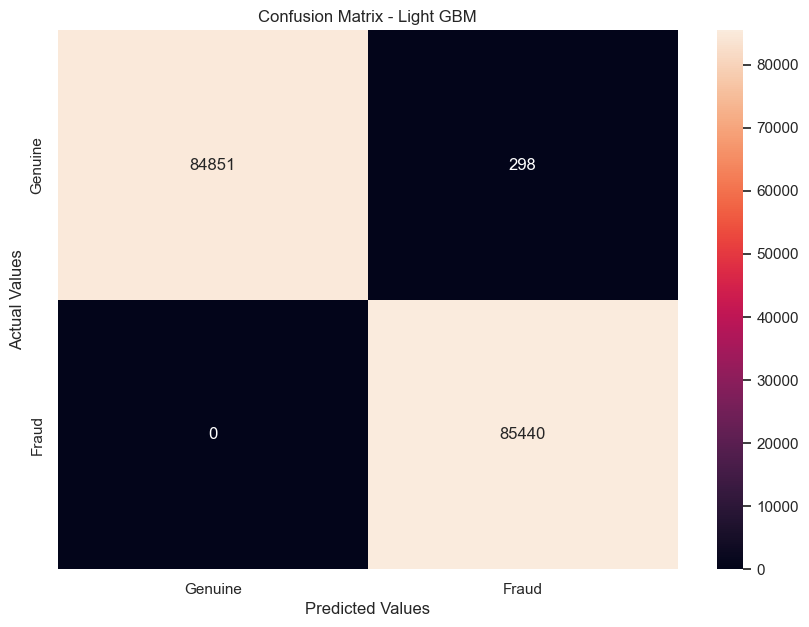

In [ ]:
# Confusion Matrix for lgbm
confusion_matrix_lgbm = confusion_matrix(y_test, y_predictions_lgbm)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_lgbm, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Light GBM')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [ ]:
# Printing Evaluation Metrics for lgbm
metrics = [['Accuracy',(accuracy_score(y_test, y_predictions_lgbm))],
                         ['Precision',precision_score(y_test, y_predictions_lgbm)],
                         ['Recall', recall_score(y_test, y_predictions_lgbm)],
                         ['F1_score',f1_score(y_test, y_predictions_lgbm)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.998253
1,Precision,0.996524
2,Recall,1.000000
3,F1_score,0.998259


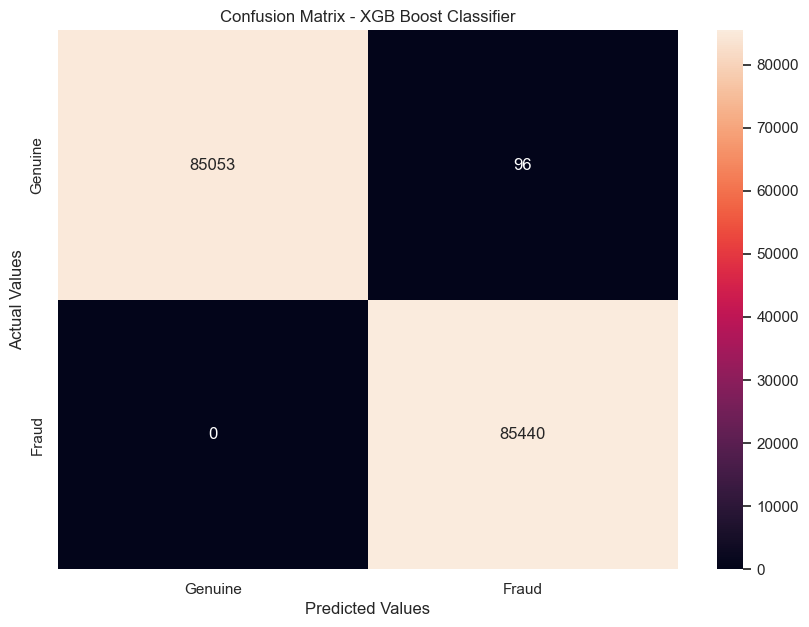

In [ ]:
# Confusion Matrix for xgb
confusion_matrix_xgb = confusion_matrix(y_test, y_predictions_xgb)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - XGB Boost Classifier')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [ ]:
# Printing Evaluation Metrics for xgb
metrics = [['Accuracy',(accuracy_score(y_test, y_predictions_xgb))],
                         ['Precision',precision_score(y_test, y_predictions_xgb)],
                         ['Recall', recall_score(y_test, y_predictions_xgb)],
                         ['F1_score',f1_score(y_test, y_predictions_xgb)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.999437
1,Precision,0.998878
2,Recall,1.000000
3,F1_score,0.999439


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create a dictionary to store classifier names and predictions
classifiers = {
    'Decision Tree': y_predictions_dt,
    'Random Forest': y_predictions_rf,
    'Ada Boost': y_predictions_ab,
    'Gradient Boosting': y_prediction_gb,
    'LightGBM': y_predictions_lgbm,
    'XGBoost': y_predictions_xgb
}

# Create an empty dictionary to store evaluation metrics
evaluation_metrics = {}

# Loop through classifiers and calculate evaluation metrics
for clf_name, y_pred in classifiers.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store evaluation metrics in the dictionary
    evaluation_metrics[clf_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Create a DataFrame from the dictionary of evaluation metrics
metrics_df = pd.DataFrame.from_dict(evaluation_metrics, orient='index')

# Display the DataFrame
print(metrics_df)

                   Accuracy  Precision    Recall  F1 Score
Decision Tree      0.995709   0.992935  0.998537  0.995728
Random Forest      0.999637   0.999275  1.000000  0.999637
Ada Boost          0.978310   0.977253  0.979494  0.978372
Gradient Boosting  0.979418   0.977381  0.981625  0.979498
LightGBM           0.998253   0.996524  1.000000  0.998259
XGBoost            0.999437   0.998878  1.000000  0.999439
